In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
import seaborn as sns

data_csv = pd.read_csv("FAOSTAT_data_1-4-2021.csv", sep=',')
data_csv1 = pd.read_csv("FAOSTAT_data_2-4-2021.csv", sep=',')
data_csv2 = pd.read_csv("FAOSTAT_data_3-4-2021.csv", sep=',')
data_csv3 = pd.read_csv("FAOSTAT_data_4-4-2021.csv", sep=',')

data_csv1['Origine'] = 'Vegetal'
data_csv2['Origine'] = 'Animal'
data_glob_ali = data_csv1.append(data_csv2)
data_pop = data_csv.pivot_table(values='Valeur',index=['Zone'],columns=['Année']).reset_index()
data_glob_ali = data_glob_ali.pivot_table(values='Valeur',index=['Zone'],columns=['Produit']).reset_index()
data_dispo_ali = data_csv3.pivot_table(values='Valeur',index=['Zone'],columns=['Élément']).reset_index()

In [2]:
data_pop.iloc[100:150]

Année,Zone,2017,2018
100,Mongolie,3114,3170
101,Monténégro,628,628
102,Mozambique,28649,29496
103,Myanmar,53383,53708
104,Namibie,2403,2448
105,Nicaragua,6385,6466
106,Niger,21602,22443
107,Nigéria,190873,195875
108,Norvège,5296,5338
109,Nouvelle-Calédonie,277,280


In [3]:
# Boxplot
# Selection de clusters
# Afficher la liste des pays sous forme de dataframe csv
# K-means 
# Selection de clusters
# Afficher la liste des pays sous forme de dataframe csv

## Préparation du dataset

In [4]:
# Population
data_pop['Différences_populations'] = np.around(((data_pop.loc[:,2018].values-data_pop.loc[:,2017].values)/data_pop.loc[:,2017].values),decimals = 3)*100
data_pop_fin = data_pop.drop([2017,2018],axis=1)
#data_pop_fin[2018] = data_pop_fin[2018]
# Proportion protéines
data_glob_ali['Protéines_animales_pourcent'] = np.around(data_glob_ali['Produits Animaux']/(data_glob_ali['Produits Vegetaux']+data_glob_ali['Produits Animaux']),decimals = 2)*100
data_glob_ali_fin = data_glob_ali.drop(['Produits Animaux','Produits Vegetaux'],axis=1)

# Jointure  
dataset = pd.merge(data_pop_fin,data_glob_ali_fin,how='inner',on='Zone')
dataset = pd.merge(dataset,data_dispo_ali,how='inner',on='Zone')
dataset = dataset.set_index('Zone')
dataset = dataset.drop(['Chine - RAS de Hong-Kong','Chine - RAS de Macao','Chine, Taiwan Province de','Chine, continentale','France'],axis=0)
dataset = dataset.reset_index()
dataset['Zone'] = dataset['Zone'].astype(str)
#dataset[2018] = dataset[2018].astype(float)
dataset.dtypes
#dataset = dataset.rename(columns = {'2018':'Population'})

Zone                                                         object
Différences_populations                                     float64
Protéines_animales_pourcent                                 float64
Disponibilité alimentaire (Kcal/personne/jour)              float64
Disponibilité de protéines en quantité (g/personne/jour)    float64
dtype: object

In [5]:
dataset

,Zone,Différences_populations,Protéines_animales_pourcent,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,2.4,19.0,2040.0,55.52
1,Afrique du Sud,1.4,43.0,2899.0,84.37
2,Albanie,-0.0,53.0,3360.0,115.74
3,Algérie,2.0,27.0,3322.0,91.83
4,Allemagne,0.6,61.0,3554.0,105.40
...,...,...,...,...,...
163,Émirats arabes unis,1.5,46.0,3314.0,110.26
164,Équateur,1.8,47.0,2606.0,65.96
165,États-Unis d'Amérique,0.6,65.0,3782.0,113.74
166,Éthiopie,2.7,10.0,2338.0,66.33


# Projet 5 : Etude de marché

### Dendogramme

In [6]:
# import de l'échantillon et des informations relatives aux cours

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
#theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
dataset.set_index('Zone',inplace=True)
X = dataset.values
names = dataset.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled,method= 'ward',metric='euclidean')


#plot_dendrogram(Z, dataset.index)
dataset = dataset.reset_index()

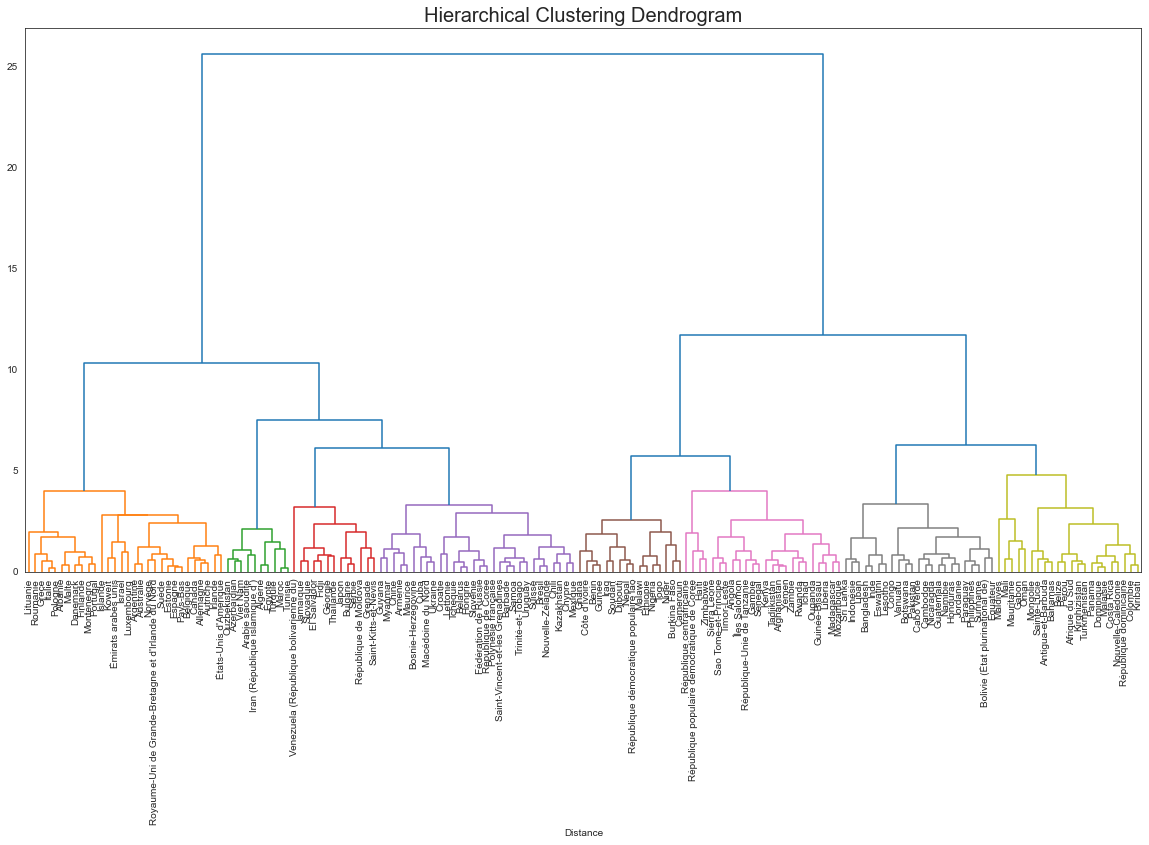

In [7]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z,p=5, labels = names, leaf_font_size=10, color_threshold=5, orientation='top')
fig.savefig('dendogram.png')
plt.show()

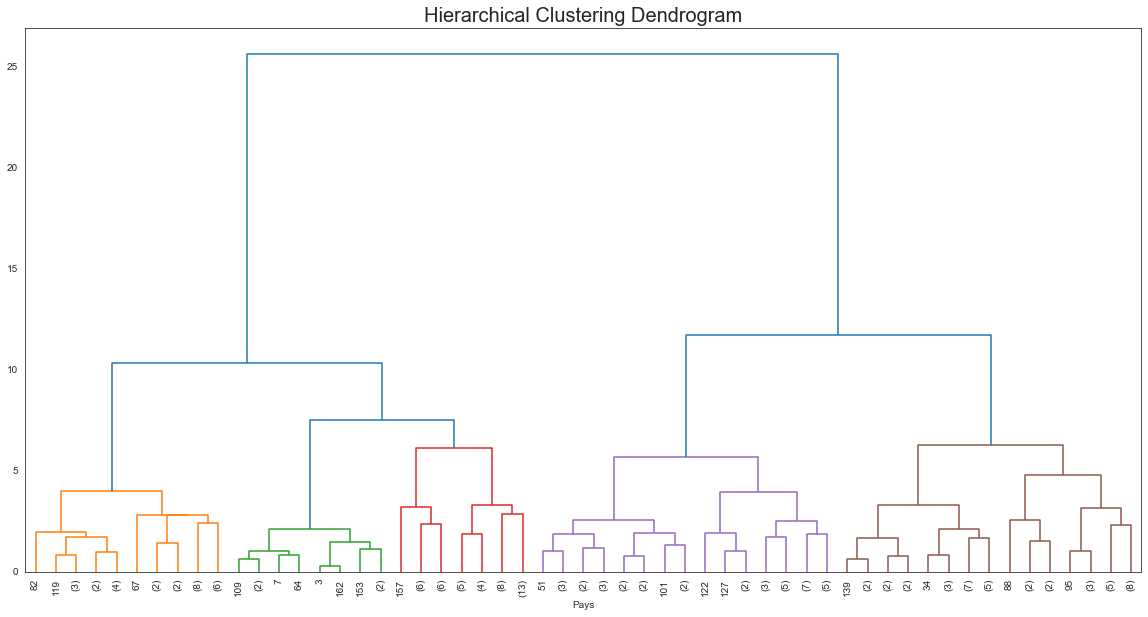

In [8]:
#Affichage d'un premier dendrogramme global
fig = plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Pays')

dendrogram(Z,p=5,truncate_mode='level' ,labels = dataset.index, leaf_font_size=10, color_threshold=7, orientation='top')
fig.savefig('dendogram5.png')
plt.show()

In [9]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

dendo_clust = pd.DataFrame({"cluster": clusters, "Zone": names})

data_clust = pd.merge(dataset,dendo_clust,how='inner',on='Zone')

In [10]:
data_clust.groupby(['cluster']).count()

,Zone,Différences_populations,Protéines_animales_pourcent,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
cluster,,,,,
1,30,30,30,30,30
2,10,10,10,10,10
3,43,43,43,43,43
4,40,40,40,40,40
5,45,45,45,45,45


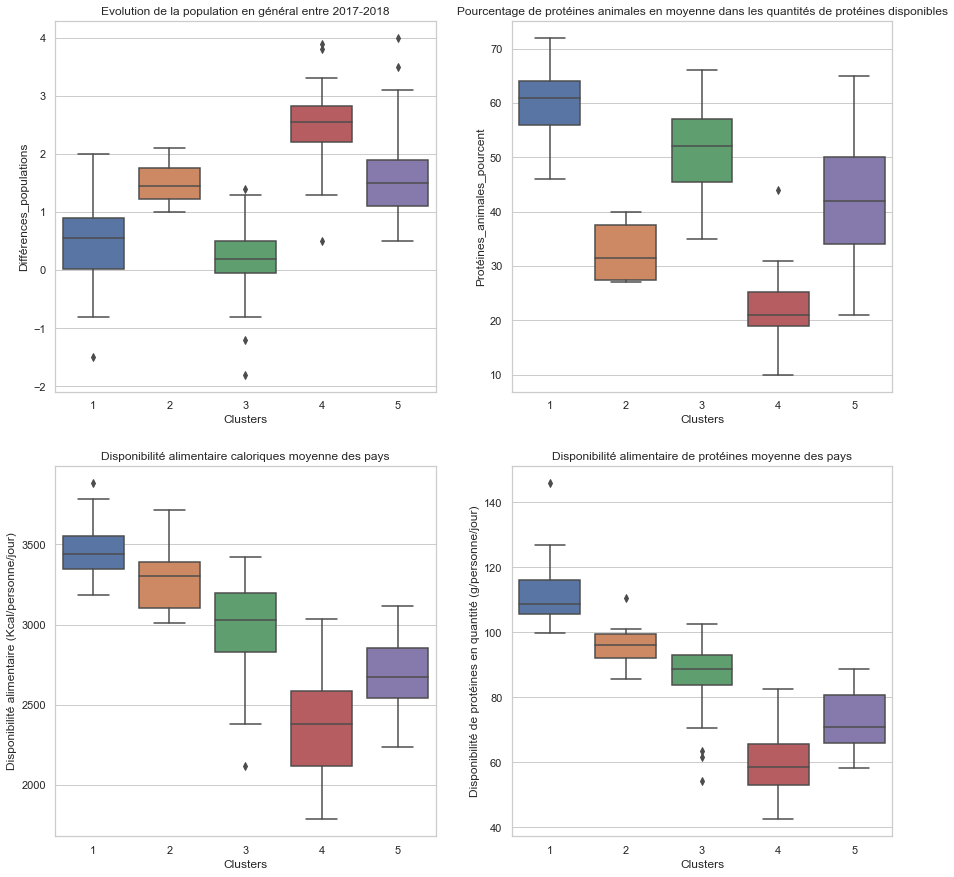

In [11]:
data1 = []
data2 = []
data3 = []
data4 = []

plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(x="cluster", y="Différences_populations", data=data_clust)
plt.title('Evolution de la population en général entre 2017-2018')
plt.xlabel('Clusters')

plt.subplot(222)
sns.boxplot(x="cluster", y="Protéines_animales_pourcent", data=data_clust)
plt.title('Pourcentage de protéines animales en moyenne dans les quantités de protéines disponibles')
plt.xlabel('Clusters')

plt.subplot(223)
sns.boxplot(x="cluster", y="Disponibilité alimentaire (Kcal/personne/jour)", data=data_clust)
plt.title('Disponibilité alimentaire caloriques moyenne des pays')
plt.xlabel('Clusters')

plt.subplot(224)
sns.boxplot(x="cluster", y="Disponibilité de protéines en quantité (g/personne/jour)", data=data_clust)
plt.title('Disponibilité alimentaire de protéines moyenne des pays')
plt.xlabel('Clusters')

plt.show(block=False)

In [12]:
data_clust_fin = data_clust[(data_clust['cluster'] == 1)|(data_clust['cluster'] == 2)]
print(data_clust_fin.shape,data_clust.shape)
#data_clust_fin['Zone']

(40, 6) (168, 6)


J'ai fait le choix de prendre le cluster 1 car celui-ci présente notamment car ce groupe présente d'importantes disponibilités alimentaire calorique et de protéines. Ayant de plus grandes valeurs, j'ai ainsi privilègié le cluster 1 au lieu du cluster 2, qui présente un profil relativement similaire avec une population et évolution se rapprochant davantage voire dépassant 1 contrairement au cluster 1 mais a des disponibilités alimentaires moyennes légèrement inférieure.

En outre, le choix du cluster 3 se justifie par sa population moyenne très importante et des disponiblités alimentaires bonnes voire égales au cluster 2. On peut toutefois noter des pourcentage de protéines relativement faible.

### ACP

In [13]:
crois = pd.read_csv('Croissance.csv',sep=',"')
pib = pd.read_csv('PIB.csv',sep=',"')
Import = pd.read_csv('Importation.csv',sep=',"')
croissé = crois.drop(['"Country Code""', '"Indicator Name""',
       '"Indicator Code""', '"1960""', '"1961""', '"1962""', '"1963""',
       '"1964""', '"1965""', '"1966""', '"1967""', '"1968""', '"1969""',
       '"1970""', '"1971""', '"1972""', '"1973""', '"1974""', '"1975""',
       '"1976""', '"1977""', '"1978""', '"1979""', '"1980""', '"1981""',
       '"1982""', '"1983""', '"1984""', '"1985""', '"1986""', '"1987""',
       '"1988""', '"1989""', '"1990""', '"1991""', '"1992""', '"1993""',
       '"1994""', '"1995""', '"1996""', '"1997""', '"1998""', '"1999""',
       '"2000""', '"2001""', '"2002""', '"2003""', '"2004""', '"2005""',
       '"2006""', '"2007""', '"2008""', '"2009""', '"2010""', '"2011""',
       '"2012""', '"2013""', '"2014""', '"2015""', '"2016""', '"2017""',
       '"2019""', '"2020""', 'Unnamed: 65' ],axis =1)
pibeu = pib.drop(['"Country Code""', '"Indicator Name""',
       '"Indicator Code""', '"1960""', '"1961""', '"1962""', '"1963""',
       '"1964""', '"1965""', '"1966""', '"1967""', '"1968""', '"1969""',
       '"1970""', '"1971""', '"1972""', '"1973""', '"1974""', '"1975""',
       '"1976""', '"1977""', '"1978""', '"1979""', '"1980""', '"1981""',
       '"1982""', '"1983""', '"1984""', '"1985""', '"1986""', '"1987""',
       '"1988""', '"1989""', '"1990""', '"1991""', '"1992""', '"1993""',
       '"1994""', '"1995""', '"1996""', '"1997""', '"1998""', '"1999""',
       '"2000""', '"2001""', '"2002""', '"2003""', '"2004""', '"2005""',
       '"2006""', '"2007""', '"2008""', '"2009""', '"2010""', '"2011""',
       '"2012""', '"2013""', '"2014""', '"2015""', '"2016""', '"2017""',
       '"2019""', '"2020""', 'Unnamed: 65' ],axis =1)
Import_ex = Import.drop(['"Country Code""', '"Indicator Name""',
       '"Indicator Code""', '"1960""', '"1961""', '"1962""', '"1963""',
       '"1964""', '"1965""', '"1966""', '"1967""', '"1968""', '"1969""',
       '"1970""', '"1971""', '"1972""', '"1973""', '"1974""', '"1975""',
       '"1976""', '"1977""', '"1978""', '"1979""', '"1980""', '"1981""',
       '"1982""', '"1983""', '"1984""', '"1985""', '"1986""', '"1987""',
       '"1988""', '"1989""', '"1990""', '"1991""', '"1992""', '"1993""',
       '"1994""', '"1995""', '"1996""', '"1997""', '"1998""', '"1999""',
       '"2000""', '"2001""', '"2002""', '"2003""', '"2004""', '"2005""',
       '"2006""', '"2007""', '"2008""', '"2009""', '"2010""', '"2011""',
       '"2012""', '"2013""', '"2014""', '"2015""', '"2016""', '"2017""',
       '"2019""', '"2020""', 'Unnamed: 65' ],axis =1)

<ipython-input-13-c13be8cb4dd7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  crois = pd.read_csv('Croissance.csv',sep=',"')
<ipython-input-13-c13be8cb4dd7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pib = pd.read_csv('PIB.csv',sep=',"')
<ipython-input-13-c13be8cb4dd7>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Import = pd.read_csv('Importation.csv',sep=',"')


In [14]:
croissé['ï»¿"Country Name'] = [i.replace(',','') for i in croissé['ï»¿"Country Name']]
croissé['ï»¿"Country Name'] = [i.replace('"','') for i in croissé['ï»¿"Country Name']]
pibeu['ï»¿"Country Name'] = [i.replace(',','') for i in pibeu['ï»¿"Country Name']]
pibeu['ï»¿"Country Name'] = [i.replace('"','') for i in pibeu['ï»¿"Country Name']]
Import_ex['ï»¿"Country Name'] = [i.replace(',','') for i in Import_ex['ï»¿"Country Name']]
Import_ex['ï»¿"Country Name'] = [i.replace('"','') for i in Import_ex['ï»¿"Country Name']]
croissé['"2018""'] = [i.replace(',','') for i in croissé['"2018""']]
croissé['"2018""'] = [i.replace('"','') for i in croissé['"2018""']]
pibeu['"2018""'] = [i.replace(',','') for i in pibeu['"2018""']]
pibeu['"2018""'] = [i.replace('"','') for i in pibeu['"2018""']]
Import_ex['"2018""'] = [i.replace(',','') for i in Import_ex['"2018""']]
Import_ex['"2018""'] = [i.replace('"','') for i in Import_ex['"2018""']]

croissé = croissé.rename(columns = {'ï»¿"Country Name':'Zone','"2018""':'Taux_de_croissance'})
pibeu = pibeu.rename(columns = {'ï»¿"Country Name':'Zone','"2018""':'PIB_Total'})
Import_ex = Import_ex.rename(columns = {'ï»¿"Country Name':'Zone','"2018""':'Importations_pourcent_PIB'})

croissé['Zone'] = [i.replace('Ã©','é') for i in croissé['Zone']]
croissé['Zone'] = [i.replace('Ã¯','ï') for i in croissé['Zone']]
pibeu['Zone'] = [i.replace('Ã©','é') for i in pibeu['Zone']]
pibeu['Zone'] = [i.replace('Ã¯','ï') for i in pibeu['Zone']]
Import_ex['Zone'] = [i.replace('Ã©','é') for i in Import_ex['Zone']]
Import_ex['Zone'] = [i.replace('Ã¯','ï') for i in Import_ex['Zone']]
croissé['Zone'] = [i.replace('Ã«','ë') for i in croissé['Zone']]
pibeu['Zone'] = [i.replace('Ã«','ë') for i in pibeu['Zone']]
Import_ex['Zone'] = [i.replace('Ã«','ë') for i in Import_ex['Zone']]
croissé['Zone'] = [i.replace('Ã¨','è') for i in croissé['Zone']]
pibeu['Zone'] = [i.replace('Ã¨','è') for i in pibeu['Zone']]
Import_ex['Zone'] = [i.replace('Ã¨','è') for i in Import_ex['Zone']]
croissé['Zone'] = [i.replace('Ã‰','É') for i in croissé['Zone']]
pibeu['Zone'] = [i.replace('Ã‰','É') for i in pibeu['Zone']]
Import_ex['Zone'] = [i.replace('Ã‰','É') for i in Import_ex['Zone']]

data_clust['Zone'] = data_clust['Zone'].replace('Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Royaume-Uni')
data_clust['Zone'] = data_clust['Zone'].replace('République de Corée','Corée')
data_clust['Zone'] = data_clust['Zone'].replace('États-Unis d\'Amérique','États-Unis')
croissé['Zone'] = croissé['Zone'].replace('Corée République de','Corée')
pibeu['Zone'] = pibeu['Zone'].replace('Corée République de','Corée')
Import_ex['Zone'] = Import_ex['Zone'].replace('Corée République de','Corée')

In [15]:
data_eco0 = pd.merge(data_clust_fin,croissé, how='inner',on='Zone')
data_eco1 = pd.merge(data_clust_fin,pibeu, how='inner',on='Zone')
data_eco2 = pd.merge(data_clust_fin,Import_ex, how='inner',on='Zone')

In [16]:

data_eco0['Taux_de_croissance']

0      4.07130129479023
1       1.2000000000002
2      1.26799523225071
3      2.43411077754232
4     -2.56535187644216
5      2.94928577160958
6      2.58012073304926
7      1.50040170699388
8      1.81229599862863
9      2.01363918733426
10     2.17564638865319
11     2.43004714546871
12     4.35546476501582
13     1.51758861140196
14     1.93437065932918
15     8.16987071841437
16     3.81442300431327
17     3.45370255788211
18    0.944089468582305
19     1.24627381406719
20      3.9368459012309
21     3.11083626560442
22     5.17859848221423
23     3.14850265040512
24     5.07791065599665
25     1.28954820126177
26     5.44644486222825
27     2.36091509478513
28       5.353704746044
29     2.84932594937632
30     4.47452377497343
31     1.95002284569983
32     2.66445332282932
33     2.95896672404676
34     7.07578861674985
35     1.18985564163665
Name: Taux_de_croissance, dtype: object

In [17]:
data_eco0['Taux_de_croissance'] = data_eco0['Taux_de_croissance'].astype(float)
data_eco1['PIB_Total'] = data_eco1['PIB_Total'].astype(float)
data_eco2['Importations_pourcent_PIB'] = data_eco2['Importations_pourcent_PIB'].astype(float)

data_eco0['Taux_de_croissance'] = np.around(data_eco0['Taux_de_croissance'],decimals = 2)
data_eco1['PIB_Total'] = np.around(data_eco1['PIB_Total'],decimals = 2)
data_eco2['Importations_pourcent_PIB'] = np.around(data_eco2['Importations_pourcent_PIB'],decimals = 2)

print(data_eco0[data_eco0['Taux_de_croissance'].isnull() == True])
print(data_eco1[data_eco1['PIB_Total'].isnull() == True])
print(data_eco2[data_eco2['Importations_pourcent_PIB'].isnull() == True])
print(len(data_eco0))
print(len(data_eco1))
print(len(data_eco2))
data_eco = pd.merge(data_eco1,data_eco2, how='inner',on='Zone')

Empty DataFrame
Columns: [Zone, Différences_populations, Protéines_animales_pourcent, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), cluster, Taux_de_croissance]
Index: []
Empty DataFrame
Columns: [Zone, Différences_populations, Protéines_animales_pourcent, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), cluster, PIB_Total]
Index: []
Empty DataFrame
Columns: [Zone, Différences_populations, Protéines_animales_pourcent, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), cluster, Importations_pourcent_PIB]
Index: []
36
36
36


In [18]:
elevage = pd.read_csv('FAOSTAT_data_5-2021.csv',sep=',')
tx_change = pd.read_csv('FAOSTAT_data_6-2021.csv',sep=',')
import_poulet = pd.read_csv('FAOSTAT_data_7-2021.csv',sep=',')

In [19]:
data_eco = pd.merge(data_eco0,data_eco1, how='inner',on='Zone')
data_eco = pd.merge(data_eco,data_eco2, how='inner',on='Zone')

elvg = elevage.drop(['Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole'],axis=1)
elvg = elvg.rename(columns = {'Valeur':'Élevage (1000 têtes)'})

tx_chge = tx_change.drop(['Code Domaine','Domaine','Code zone','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole','Code de devise ISO','Note','Devise'],axis=1)
tx_chge = tx_chge.rename(columns = {'Valeur':'Taux de change - Annuels'})
 

imp_plt = import_poulet.drop(['Code Domaine','Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Code année','Année','Unité','Symbole','Description du Symbole'],axis=1)
imp_plt = imp_plt.rename(columns = {'Valeur':'Importations - Valeur (1000$)'})

elvg['Zone'] = elvg['Zone'].replace('Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Royaume-Uni')
elvg['Zone'] = elvg['Zone'].replace('République de Corée','Corée')
elvg['Zone'] = elvg['Zone'].replace('États-Unis d\'Amérique','États-Unis')

tx_chge['Zone'] = tx_chge['Zone'].replace('Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Royaume-Uni')
tx_chge['Zone'] = tx_chge['Zone'].replace('République de Corée','Corée')
tx_chge['Zone'] = tx_chge['Zone'].replace('États-Unis d\'Amérique','États-Unis')

imp_plt['Zone'] = imp_plt['Zone'].replace('Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord','Royaume-Uni')
imp_plt['Zone'] = imp_plt['Zone'].replace('République de Corée','Corée')
imp_plt['Zone'] = imp_plt['Zone'].replace('États-Unis d\'Amérique','États-Unis')

data_elv = pd.merge(data_clust_fin,elvg, how='inner',on='Zone')
data_tx = pd.merge(data_clust_fin,tx_chge, how='inner',on='Zone')
data_imp = pd.merge(data_clust_fin,imp_plt, how='inner',on='Zone')
print(len(data_elv))
print(len(data_tx))
print(len(data_imp))

data_alim = pd.merge(data_tx,data_elv, how='inner',on='Zone')
data_alim2 = pd.merge(data_alim,data_imp, how='inner',on='Zone')
df_final_eco = pd.merge(data_alim2,data_eco, how='inner',on='Zone')
df_final_eco = df_final_eco.drop(['cluster_x_x','Différences_populations_y_x', 'Protéines_animales_pourcent_y_x',
       'Disponibilité alimentaire (Kcal/personne/jour)_y_x',
       'Disponibilité de protéines en quantité (g/personne/jour)_y_x',
       'cluster_y_x','Différences_populations_x',
       'Protéines_animales_pourcent_x',
       'Disponibilité alimentaire (Kcal/personne/jour)_x',
       'Disponibilité de protéines en quantité (g/personne/jour)_x',
       'cluster_x','Différences_populations_x_y', 'Protéines_animales_pourcent_x_y',
       'Disponibilité alimentaire (Kcal/personne/jour)_x_y',
       'Disponibilité de protéines en quantité (g/personne/jour)_x_y',
       'cluster_x_y','Différences_populations_y_y',
       'Protéines_animales_pourcent_y_y',
       'Disponibilité alimentaire (Kcal/personne/jour)_y_y',
       'Disponibilité de protéines en quantité (g/personne/jour)_y_y',
       'cluster_y_y','Différences_populations_y',
       'Protéines_animales_pourcent_y',
       'Disponibilité alimentaire (Kcal/personne/jour)_y',
       'Disponibilité de protéines en quantité (g/personne/jour)_y',
       'cluster_y'],axis=1)

df_final_eco = df_final_eco.rename(columns = {'Différences_populations_x_x':'Différences_populations','Protéines_animales_pourcent_x_x':'Protéines_animales_pourcent','Disponibilité alimentaire (Kcal/personne/jour)_x_x':'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)_x_x':'Disponibilité de protéines en quantité (g/personne/jour)'})
df_final_eco['Taux de change - Annuels'] = df_final_eco[df_final_eco['Taux de change - Annuels'] != 0.8468]['Taux de change - Annuels']/0.8468
df_final_eco['Taux de change - Annuels'] = df_final_eco['Taux de change - Annuels'].replace(np.NaN,1.00)

38
38
38


In [20]:
df_final_eco

,Zone,Différences_populations,Protéines_animales_pourcent,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Taux de change - Annuels,Élevage (1000 têtes),Importations - Valeur (1000$),Taux_de_croissance,PIB_Total,Importations_pourcent_PIB
0,Albanie,-0.0,53.0,3360.0,115.74,127.526216,15587,11422,4.07,1.514702e+10,45.26
1,Algérie,2.0,27.0,3322.0,91.83,137.687530,285955,30,1.20,1.754057e+11,32.11
2,Allemagne,0.6,61.0,3554.0,105.40,1.000000,1530127,2736131,1.27,3.963768e+12,41.22
3,Arabie saoudite,1.8,38.0,3307.0,86.94,4.428436,710309,1272106,2.43,7.865218e+11,26.65
4,Argentine,1.0,65.0,3307.0,106.77,33.177846,2114787,24185,-2.57,5.176267e+11,16.56
5,Australie,1.3,67.0,3391.0,105.94,1.580538,1232411,62196,2.95,1.432881e+12,21.44
6,Autriche,0.8,60.0,3695.0,109.12,1.000000,124240,479773,2.58,4.550949e+11,52.42
7,Azerbaïdjan,1.1,34.0,3149.0,94.42,2.007558,109121,42306,1.50,4.711294e+10,37.58
8,Belgique,0.5,59.0,3769.0,99.87,1.000000,469550,791553,1.81,5.437344e+11,83.25
9,Canada,0.9,54.0,3566.0,104.12,1.530231,1478415,476649,2.01,1.716263e+12,34.04


Je vais donc faire le choix de me baser sur 5 clusters et poursuivre mon analyse avec les clusters 1 et 3. J'ai fait ce choix car nous avons de meilleures valeurs avec 5 clusters. Les clusters 1 et 2 pour 4 clusters et nos clusters 1 et 3 ont des profils plutôt similaire cependant le cluster 1 a dans l'ensemble des valeurs supérieures pour 5 clusters, et le cluster 3 a une meilleure évolution de sa population que le cluster 2. 

In [21]:
#méthode de calcul et d'affichage des cercles de corrélation et de l'ACP

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, pca, axis_ranks, labels=None, alpha=1):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    
    fig_1 = plt.figure(figsize=(8,7))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.savefig('Eboulis.png')
    plt.show(block=False)

In [22]:
from sklearn import decomposition

data = df_final_eco.drop(['Zone'],axis=1)
X = data.values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components = 4)
pca.fit(X_scaled)

PCA(n_components=4)

v1 : Différences_populations
v2 : Protéines_animales_pourcent
v3 : Disponibilité alimentaire (Kcal/personne/jour)
v4 : Disponibilité de protéines en quantité (g/personne/jour)
v5 : Taux de change - Annuels
v6 : Élevage (1000 têtes)
v7 : Importations - Valeur (1000$)
v8 : Taux_de_croissance
v9 : PIB_Total
v10 : Importations_pourcent_PIB


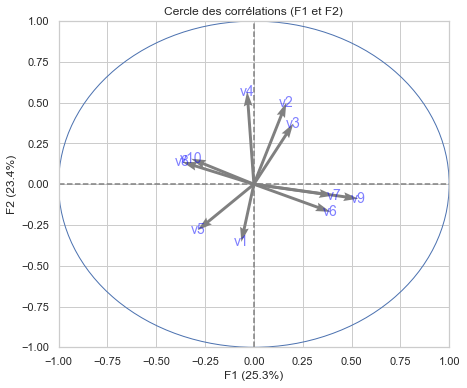

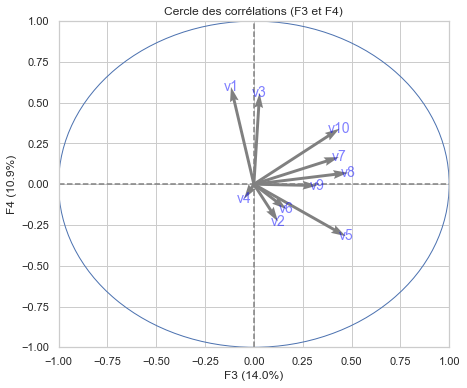

v6 et v9 sont très corrélés entre eux et avec F1
v2, v3 et v4 sont corrélés sur l'axe F2
v5, v6, v8 et v9 sont anti-corrélés à v7 mais sont globalement mal représenté
v9, v7 et v6 sont corrélés sur F4 et v10, v5 et v8 y sont globalement anti-corrélés mais sont mal représenté
v9, v6, v5 et v8 sont corrélés sur F3
v1, v3 sont corrélés sur F4 et anti-corrélés à v2
     
F1 : Richesses économiques et agricoles actuelle
F2 : Disponibilité alimentaire des pays
F3 : Prospérité des pays
F4 : Concentration en protéines
     
     


In [23]:

#ACP


features = data.columns
pcs = pca.components_
var = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11']

print('v1 : Différences_populations')
print('v2 : Protéines_animales_pourcent')
print('v3 : Disponibilité alimentaire (Kcal/personne/jour)')
print('v4 : Disponibilité de protéines en quantité (g/personne/jour)')
print('v5 : Taux de change - Annuels')
print('v6 : Élevage (1000 têtes)')
print('v7 : Importations - Valeur (1000$)')
print('v8 : Taux_de_croissance')
print('v9 : PIB_Total')
print('v10 : Importations_pourcent_PIB')

#display_circles(pcs, 4, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))
display_circles(pcs, 4, pca, [(0,1),(2,3)],labels = np.array(var))

X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected_2, 4, pca2, [(0,1),(2,3)], alpha = 0.2)

print('v6 et v9 sont très corrélés entre eux et avec F1')
print('v2, v3 et v4 sont corrélés sur l\'axe F2')
print('v5, v6, v8 et v9 sont anti-corrélés à v7 mais sont globalement mal représenté')
print('v9, v7 et v6 sont corrélés sur F4 et v10, v5 et v8 y sont globalement anti-corrélés mais sont mal représenté')
print('v9, v6, v5 et v8 sont corrélés sur F3')
print('v1, v3 sont corrélés sur F4 et anti-corrélés à v2')
print(' '*5)
print('F1 : Richesses économiques et agricoles actuelle')
print('F2 : Disponibilité alimentaire des pays')
print('F3 : Prospérité des pays')
print('F4 : Concentration en protéines')
print(' '*5)
print(' '*5)


plt.show()

### Résultat de l'ACP

In [24]:
df_final_eco

,Zone,Différences_populations,Protéines_animales_pourcent,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Taux de change - Annuels,Élevage (1000 têtes),Importations - Valeur (1000$),Taux_de_croissance,PIB_Total,Importations_pourcent_PIB
0,Albanie,-0.0,53.0,3360.0,115.74,127.526216,15587,11422,4.07,1.514702e+10,45.26
1,Algérie,2.0,27.0,3322.0,91.83,137.687530,285955,30,1.20,1.754057e+11,32.11
2,Allemagne,0.6,61.0,3554.0,105.40,1.000000,1530127,2736131,1.27,3.963768e+12,41.22
3,Arabie saoudite,1.8,38.0,3307.0,86.94,4.428436,710309,1272106,2.43,7.865218e+11,26.65
4,Argentine,1.0,65.0,3307.0,106.77,33.177846,2114787,24185,-2.57,5.176267e+11,16.56
5,Australie,1.3,67.0,3391.0,105.94,1.580538,1232411,62196,2.95,1.432881e+12,21.44
6,Autriche,0.8,60.0,3695.0,109.12,1.000000,124240,479773,2.58,4.550949e+11,52.42
7,Azerbaïdjan,1.1,34.0,3149.0,94.42,2.007558,109121,42306,1.50,4.711294e+10,37.58
8,Belgique,0.5,59.0,3769.0,99.87,1.000000,469550,791553,1.81,5.437344e+11,83.25
9,Canada,0.9,54.0,3566.0,104.12,1.530231,1478415,476649,2.01,1.716263e+12,34.04


In [25]:
#df_final_eco_ = df_final_eco.set_index('Zone')

In [26]:

# Dataframe avec les nouvelles variables synthétiques

df_compo = pd.DataFrame(X_projected,index=df_final_eco.index,columns=["F"+str(i+1) for i in range(4)])
#df_compobis = pd.DataFrame(X_projected_2,index=df_final_eco4_.index,columns=["F"+str(i+1) for i in range(4)])

df_compo

,F1,F2,F3,F4
0,-1.066854,0.846992,-0.502510,-0.718322
1,-0.602929,-2.768117,-1.726388,0.986031
2,5.471361,-0.623932,2.998487,0.552088
3,1.006386,-2.788533,0.020309,0.911145
4,2.092802,-0.854535,-1.851158,-1.311237
5,1.266992,-0.255362,-0.194703,-0.419616
6,0.288808,0.912925,-0.164083,0.942585
7,-0.897365,-2.196591,-1.491339,-0.207428
8,0.724442,0.628758,0.532435,1.371585
9,2.012898,-0.505602,0.217449,0.247619


In [27]:
#df_compo4.groupby(['cluster']).mean()

In [28]:
#len(df_final)

NameError: name 'df_final' is not defined

In [ ]:
#df_data = df_data[['Zone','Données alim','Proté Kcal','Dispo','Proté']]
#df_data = df_data.groupby(['Zone']).mean()
#df_data.sort_values(by='Données alim',ascending=False).iloc[0:19]['Données alim']
#df_data.sort_values(by='Proté Kcal',ascending=False).iloc[0:19]['Proté Kcal']
#df_data.sort_values(by='Dispo',ascending=False).iloc[0:19]['Dispo']
#df_data.sort_values(by='Proté',ascending=False).iloc[0:19]['Proté']

In [ ]:
#Importations - Valeur (1000$)
df_final_eco.sort_values(by='Importations - Valeur (1000$)',ascending=False).iloc[0:9]

## Hypothèse 1 :  Limiter les coûts (objectif de court terme) 

Nous allons ici essayer de cibler des pays nous permettant de limiter les coûts (coût de transport,taux de change,...).

In [ ]:
#df_final[(df_final['Taux de change - Annuels'] == 1.000000)|(df_final['Zone'] == 'Suisse')]
#df_compo.sort_values(by='F2',ascending=False)
#df_compo3
#df_final

In [ ]:
# Allemagne
# Luxembourg
# Italie
# Espagne
# Belgique

# Avantage : pays tous frontalier avec la France

# Inconvénient : la population touchée est très faible (202 millions d'habitants touché potentiellement, ce qui représente 45% de la population de l'Union Européenne)

# Conclusion : Solution viable à moyen avant de s'intéresser à de potentiel pays plus attrayant
df_compo3 = df_compo3.set_index('Zone')
print("+",'-'*16,'+','-'*22,'+','-'*27,'+','-'*24,'+','='*22,'+')
print('|','Pays sélectionné','|',' '*6,'Critère 1',' '*5,'|',' '*8,'Critère 2',' '*8,'|',' '*6,'Critère 3',' '*7,'|',' '*4,'Composantes',' '*5,'|')
print('='*126)
print('|',' '*1,df_final_eco.iloc[23]['Zone'],' '*7,'|','Taux de change annuels','|','Proximité géographique',' '*4,'|','Disponibilités aliment',' '*1,'|','F2 :',np.around(df_compo.loc['Italie','F2'],decimals=2),' F4 :',' '*0,np.around(df_compo.loc['Italie','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[4]['Zone'],' '*6,'|','Taux de change annuels','|','Proximité géographique',' '*4,'|','Valeur des importations',' '*0,'|','F2 :',' '*0,np.around(df_compo.loc['Irlande','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Irlande','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[21]['Zone'],' '*6,'|','Taux de change annuels','|','Proximité géographique',' '*4,'|','Valeur des importations',' '*0,'|','F2 :',np.around(df_compo.loc['Espagne','F2'],decimals=2),' F4 :',' '*0,np.around(df_compo.loc['Espagne','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[19]['Zone'],' '*5,'|','Taux de change annuels','|','Proximité géographique',' '*4,'|','Valeurs des Importations','|','F2 :',' '*0,np.around(df_compo.loc['Belgique','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Belgique','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[17]['Zone'],' '*4,'|','Taux de change annuels','|','Valeurs des Importations',' '*2,'|','Population totale',' '*6,'|','F2 :',np.around(df_compo.loc['Allemagne','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Allemagne','F4'],decimals=2),'|')
print("+",'-'*16,'+','-'*23,'+','-'*25,'+','-'*25,'+','='*22,'+')
print('|',' '*1, 'Avantage',' '*5,'|','La population touchée = importante (206 millions d\'habitants / 46 % de la population de l\'UE en 2019)',' '*2,'|')
print("+",'-'*16,'+','-'*104,'+')
print('|',' '*1, 'Conclusion',' '*3,'|','Solution peu viable à moyen terme',' '*70,'|')
print("+",'-'*16,'+','-'*104,'+')
df_compo3 = df_compo3.reset_index()


## Hypothèse 2 :  S'exporter dans des pays à fort potentiel (objectif de long terme) 

On va ici se concentrer sur notamment la valeur des importations effectuées par chaque pour privilégier ceux importent beaucoup, et éventuellement la population des pays.

In [ ]:
#df_final.sort_values(by='Importations - Valeur (1000$)',ascending=False)
#df_compo.sort_values(by='F3',ascending=False)
#df_compo = df_compo.reset_index()
#df_compo[(df_compo['Zone'] == 'Irlande')|(df_compo['Zone'] == 'Belgique')]
df_final[(df_final['Zone'] == 'Irlande')|(df_final['Zone'] == 'Belgique')]
df_compo

In [ ]:
print("+",'-'*16,'+','-'*25,'+','-'*25,'+','-'*17,'+','='*22,'+')
print('|','Pays sélectionné','|',' '*7,'Critère 1',' '*7,'|',' '*7,'Critère 2',' '*7,'|',' '*3,'Critère 3',' '*3,'|',' '*4,'Composantes',' '*5,'|')
print('='*121)
print('|',' '*1,df_final_eco.iloc[24]['Zone'],' '*2,'|','Valeurs des Importations',' '*0,'|','Dispo alimentaire en Kcal','|','Population totale','|','F2 :',np.around(df_compo.loc['Royaume-Uni','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Royaume-Uni','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[4]['Zone'],' '*6,'|','Disponibilité alimentaire','|','Valeurs des Importations',' '*0,'|','Proximité géo',' '*3,'|','F2 :',' '*0,np.around(df_compo.loc['Irlande','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Irlande','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[15]['Zone'],' '*3,'|','Population totale',' '*7,'|','Valeurs des Importations',' '*0,'|','Dispo alimentaire','|','F2 :',np.around(df_compo.loc['États-Unis','F2'],decimals=2),' F4 :',' '*0,np.around(df_compo.loc['États-Unis','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[27]['Zone'],' '*8,'|','Valeurs des Importations',' '*0,'|','Régime alimentaire',' '*6,'|','Population totale','|','F2 :',np.around(df_compo.loc['Corée','F2'],decimals=2),' F4 :',' '*0,np.around(df_compo.loc['Corée','F4'],decimals=2),'|')
print('|',' '*1,df_final_eco.iloc[17]['Zone'],' '*4,'|','Disponibilité alimentaire','|','Population totale',' '*7,'|','Proximité géo',' '*3,'|','F2 :',np.around(df_compo.loc['Allemagne','F2'],decimals=2),' F4 :',np.around(df_compo.loc['Allemagne','F4'],decimals=2),'|')
print("+",'-'*16,'+','-'*24,'+','-'*25,'+','-'*17,'+','='*23,'+')
print('|',' '*1, 'Avantage',' '*5,'|','Population touchée = importante (534 m d\'habitants / 119 % de la population de l\'UE en 2019)',' '*5,'|')
print("+",'-'*16,'+','-'*98,'+')
print('|',' '*1, 'Conclusion',' '*3,'|','Solution viable à long terme',' '*69,'|')
print("+",'-'*16,'+','-'*98,'+')

## Test Kolmogorov-Smirnov sur la disponibilité alimentaire

On teste ici l'adéquation de la disponibilité alimentaire à une loi normale :

In [ ]:
dataset['Disponibilité alimentaire (Kcal/personne/jour)']
from test import *
adequation_kolmo_shap(dataset['Disponibilité alimentaire (Kcal/personne/jour)'])
ks_2samp(dataset['Disponibilité alimentaire (Kcal/personne/jour)'],list(np.random.normal(np.mean(dataset['Disponibilité alimentaire (Kcal/personne/jour)']), np.std(dataset['Disponibilité alimentaire (Kcal/personne/jour)']), 1000)))[1]
scipy.stats.shapiro(dataset['Disponibilité alimentaire (Kcal/personne/jour)'])[1]

## Test de comparaison des clusters

In [ ]:
clust_0 = data_clust[data_clust['cluster'] == 1]['Disponibilité alimentaire (Kcal/personne/jour)']
clust_1 = data_clust[data_clust['cluster'] == 2]['Disponibilité alimentaire (Kcal/personne/jour)']
#data_clust

In [ ]:
import scipy
compa(clust_0,clust_1)
print(scipy.stats.ttest_ind(clust_0,clust_1, equal_var=True)[1],scipy.stats.bartlett(clust_0,clust_1)[1])